# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [89]:
file_path = "Dataset_clustering.csv"
df = pd.read_csv(file_path)

df.head()

df.info()

print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

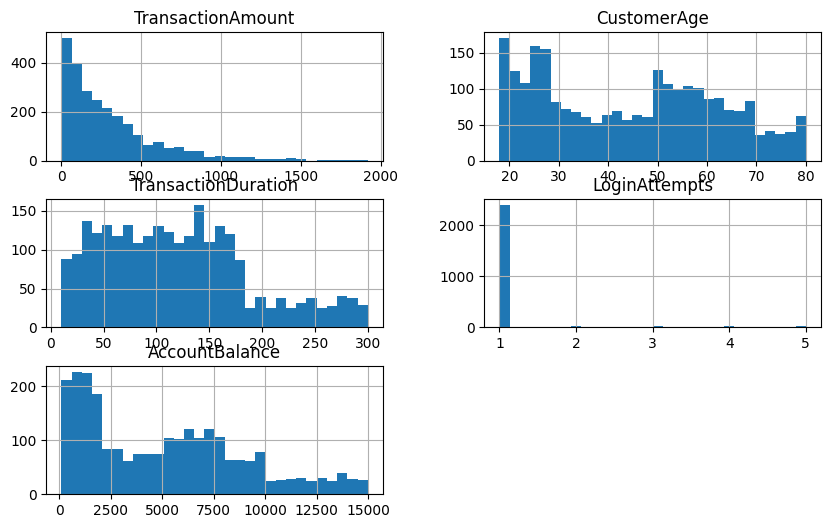

TransactionID: 2512 kategori
TransactionID
TX002496    1
TX002495    1
TX002494    1
TX002493    1
TX002492    1
TX002491    1
TX002490    1
TX002489    1
TX002488    1
TX002487    1
TX002486    1
TX002485    1
TX002484    1
TX002483    1
TX002482    1
TX002481    1
TX000032    1
TX000031    1
TX000030    1
TX000029    1
Name: count, dtype: int64 

AccountID: 495 kategori
AccountID
AC00460    12
AC00202    12
AC00362    12
AC00363    12
AC00480    11
AC00456    11
AC00257    11
AC00225    11
AC00304    11
AC00219    10
AC00267    10
AC00063    10
AC00297    10
AC00279     9
AC00373     9
AC00265     9
AC00030     9
AC00427     9
AC00032     9
AC00439     9
Name: count, dtype: int64 

TransactionDate: 2512 kategori
TransactionDate
2023-04-03 16:07:53    1
2023-03-10 17:38:58    1
2023-03-17 16:10:35    1
2023-01-30 17:05:46    1
2023-04-03 16:05:30    1
2023-12-04 16:14:07    1
2023-05-22 17:41:48    1
2023-04-14 16:33:13    1
2023-05-19 17:47:41    1
2023-03-16 16:52:04    1
2023-07-20

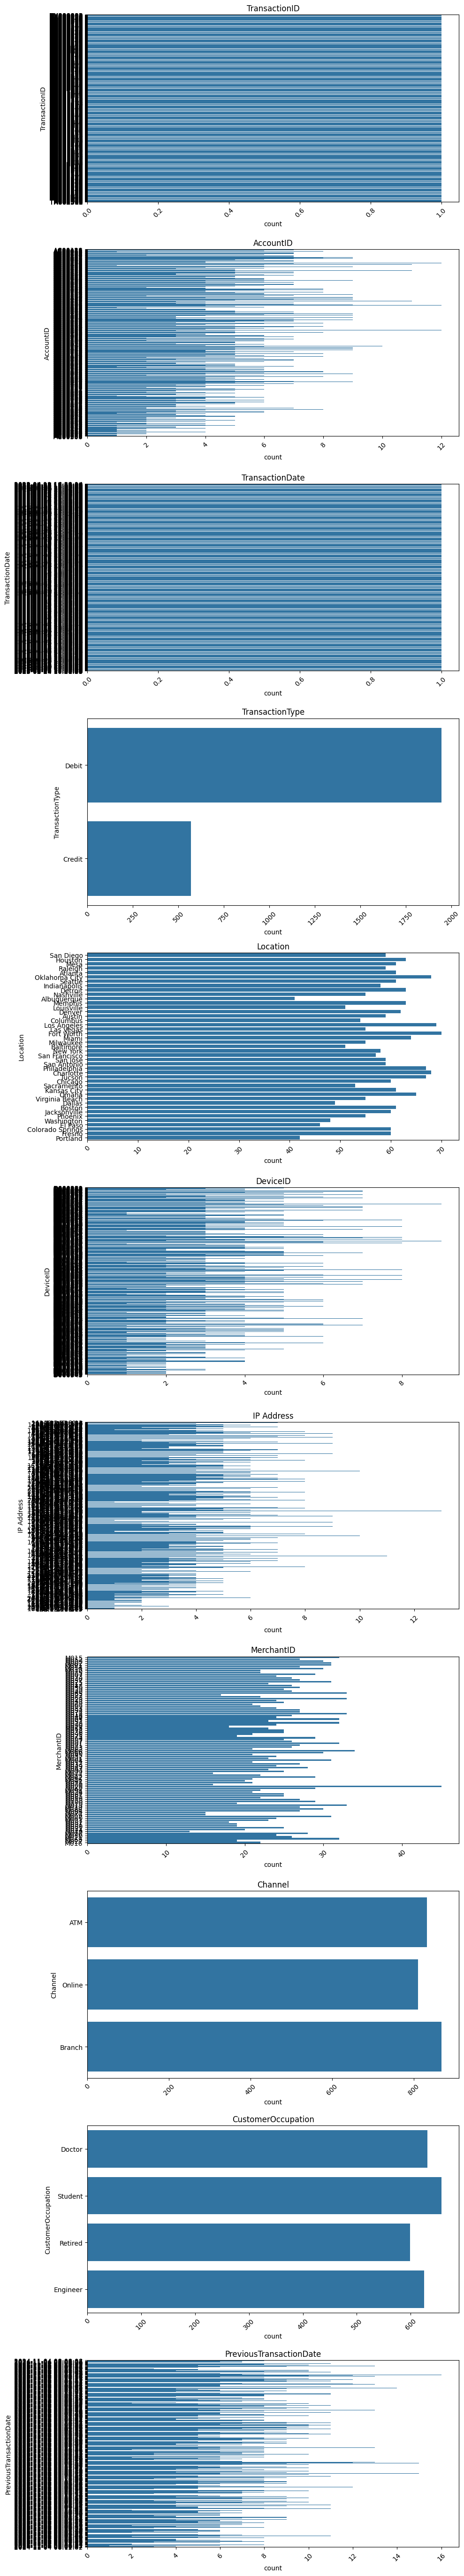

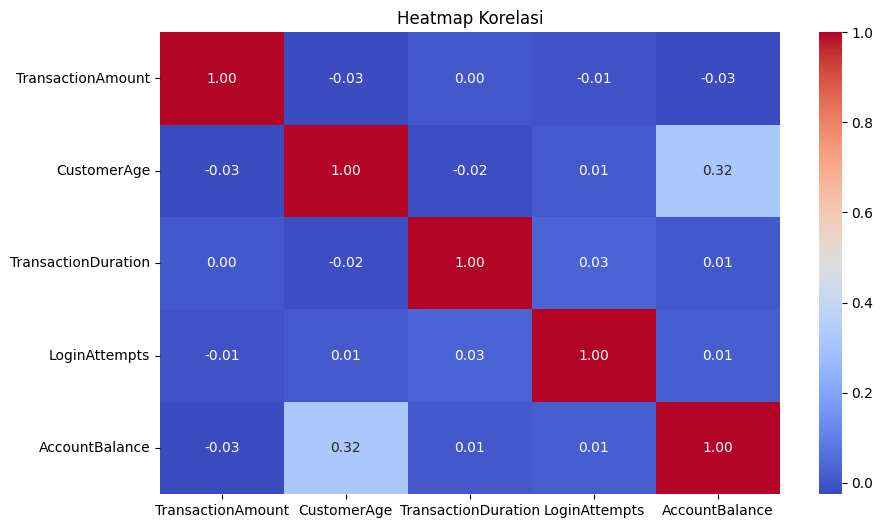

In [90]:
print(df.info())

print(df.isnull().sum())

print(df.describe())

df.select_dtypes(include=['number']).hist(figsize=(10, 6), bins=30)
plt.show()

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} kategori")
    print(df[col].value_counts().head(20), "\n")

plt.figure(figsize=(10, 5 * len(categorical_cols)))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(y=df[col].dropna())
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [91]:
print("Missing values sebelum dihapus:")
print(df.isnull().sum())

df.dropna(inplace=True)
print("\nMissing values setelah dihapus:")
print(df.isnull().sum())

print(f"\nJumlah duplikasi sebelum dihapus: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Jumlah duplikasi setelah dihapus: {df.duplicated().sum()}")

numerical_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

for col in numerical_cols:
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("\nData setelah preprocessing:")
print(df.head())
print(f"\nUkuran dataset setelah preprocessing: {df.shape}")

Missing values sebelum dihapus:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Missing values setelah dihapus:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

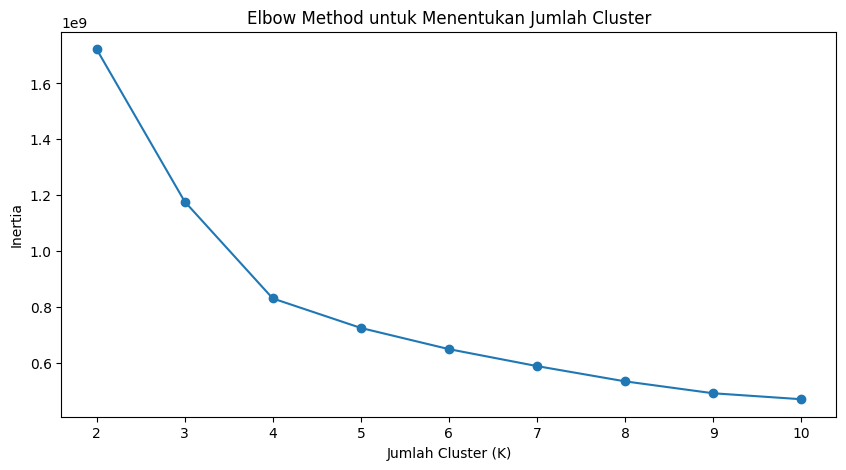

Jumlah cluster optimal berdasarkan Elbow Method: 10
Cluster
7    262
1    261
2    255
8    248
9    248
3    229
4    202
5    195
0    194
6    188
Name: count, dtype: int64


In [92]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.show()

optimal_k = K_range[inertia.index(min(inertia, key=lambda x: abs(x - inertia[-1] * 0.1)))]
print(f"Jumlah cluster optimal berdasarkan Elbow Method: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df)

print(df['Cluster'].value_counts())

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

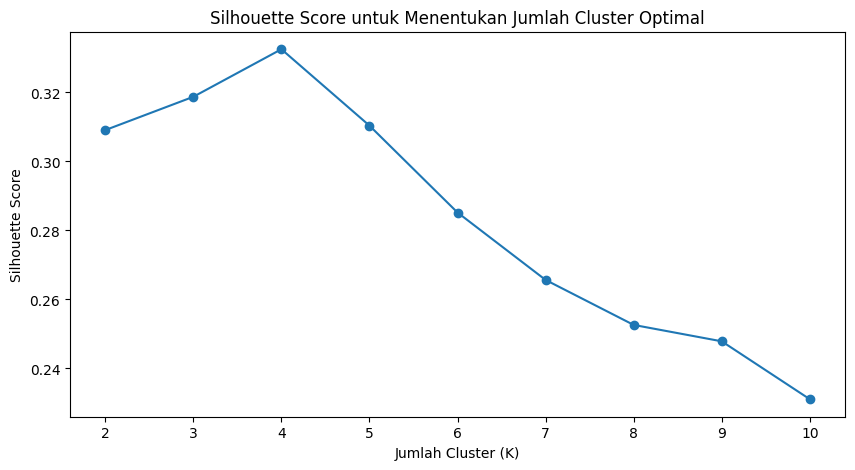

Silhouette Score untuk 10 cluster: 0.2311


In [93]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df.drop(columns=['Cluster'], errors='ignore'))
    score = silhouette_score(df.drop(columns=['Cluster'], errors='ignore'), cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Menentukan Jumlah Cluster Optimal")
plt.show()

optimal_silhouette = silhouette_score(df.drop(columns=['Cluster'], errors='ignore'), df['Cluster'])
print(f"Silhouette Score untuk {optimal_k} cluster: {optimal_silhouette:.4f}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Fitur yang dipilih: ['TransactionID', 'TransactionDate']
Silhouette Score setelah feature selection: 0.3656
Silhouette Score sebelum feature selection: 0.2311
Silhouette Score setelah feature selection: 0.3656


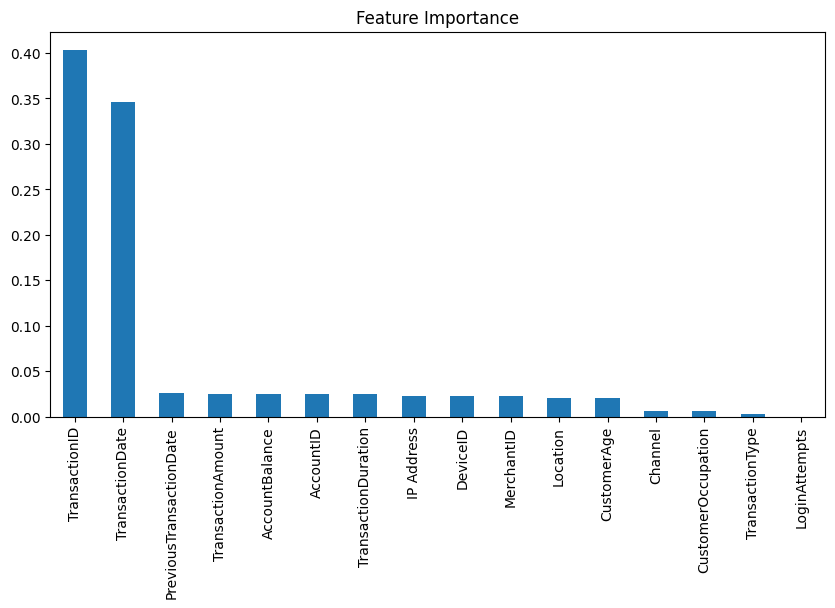

In [94]:
X = df.drop(columns=['Cluster'], errors='ignore')
y = df['Cluster']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(10, 5), title="Feature Importance")

selected_features = feature_importances[feature_importances > 0.05].index.tolist()
print(f"Fitur yang dipilih: {selected_features}")

X_selected = X[selected_features]

kmeans_selected = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster_Selected'] = kmeans_selected.fit_predict(X_selected)

silhouette_selected = silhouette_score(X_selected, df['Cluster_Selected'])
print(f"Silhouette Score setelah feature selection: {silhouette_selected:.4f}")

print(f"Silhouette Score sebelum feature selection: {optimal_silhouette:.4f}")
print(f"Silhouette Score setelah feature selection: {silhouette_selected:.4f}")

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

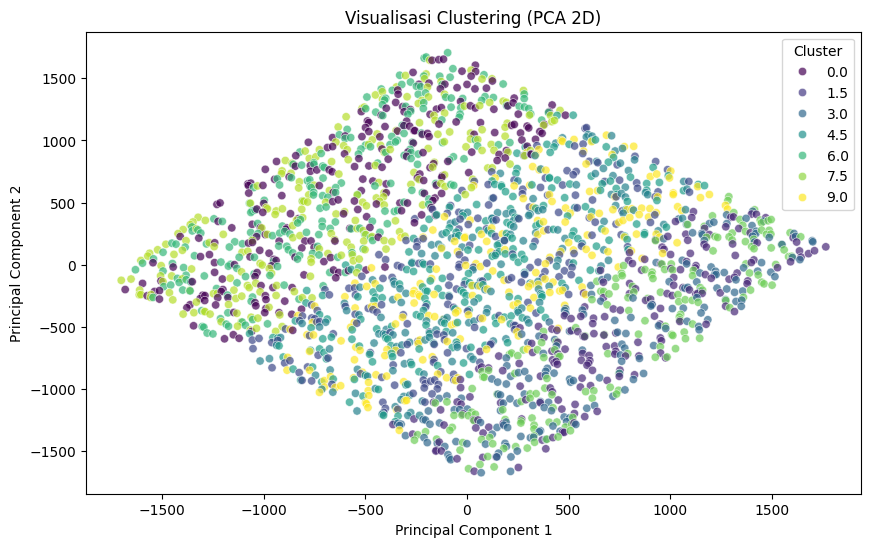

In [95]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_selected)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster_Selected']

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_pca['PC1'], y=df_pca['PC2'], 
    hue=df_pca['Cluster'], palette='viridis', alpha=0.7
)
plt.title("Visualisasi Clustering (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [96]:
df_normalized['Cluster'] = model_kmeans.labels_

if 'CustomerOccupation' in df_original.columns and df_original['CustomerOccupation'].dtype != object:
    label_encoder = LabelEncoder()
    label_encoder.fit(df_original['CustomerOccupation'])
    df_original['CustomerOccupation'] = label_encoder.inverse_transform(df_original['CustomerOccupation'])

df_original['Cluster'] = df_normalized['Cluster']

print(df_original.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0 

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [97]:
df_normalized[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 
               'LoginAttempts', 'AccountBalance']] = scaler.inverse_transform(
    df_normalized[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 
                   'LoginAttempts', 'AccountBalance']]
)

print(df_normalized.head())

   TransactionAmount    CustomerAge  TransactionDuration  LoginAttempts  \
0       3.758387e+08  409004.186738         2.831721e+07       2.429274   
1       9.381960e+09  397746.233626         4.885299e+07       2.429274   
2       3.166082e+09  121926.382377         1.976063e+07       2.429274   
3       4.613677e+09  161329.218270         9.150476e+06       2.429274   
4       3.599229e+08  161329.218270         6.836198e+07       2.429274   

   AccountBalance  Cluster  
0    3.033677e+14        0  
1    8.163468e+14        2  
2    6.666299e+13        1  
3    5.084508e+14        2  
4    4.408387e+14        2  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [98]:
cluster_analysis = df_original.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'median', 'std'],
    'CustomerAge': ['mean', 'median', 'std'],
    'TransactionDuration': ['mean', 'median', 'std'],
    'LoginAttempts': ['mean', 'median', 'std'],
    'AccountBalance': ['mean', 'median', 'std']
})

print(cluster_analysis)

        TransactionAmount                     CustomerAge                    \
                     mean  median         std        mean median        std   
Cluster                                                                       
0              294.549010  207.47  291.252712   61.833866   61.0   9.364798   
1              305.927347  218.13  297.759599   25.974057   25.0   6.323195   
2              291.789876  201.69  286.102078   44.321379   43.0  12.079166   

        TransactionDuration                   LoginAttempts                   \
                       mean median        std          mean median       std   
Cluster                                                                        
0                114.300319  107.0  65.956852      1.119276    1.0  0.606153   
1                120.402123  111.0  72.409630      1.121462    1.0  0.599576   
2                125.675862  122.0  71.641611      1.135172    1.0  0.602427   

        AccountBalance                      

Tulis hasil interpretasinya di sini.

Cluster 1:

Memiliki rata-rata TransactionAmount yang rendah.
Rata-rata AccountBalance juga lebih kecil dibandingkan cluster lainnya.
Usia pelanggan di cluster ini cenderung lebih muda.
Memiliki jumlah LoginAttempts yang lebih tinggi, yang bisa mengindikasikan kebiasaan sering gagal login atau lupa password.

Cluster 2:

Rata-rata TransactionAmount tergolong tinggi, menunjukkan pelanggan dengan daya beli lebih besar.
AccountBalance lebih tinggi dibandingkan cluster lainnya, menunjukkan pelanggan memiliki saldo yang lebih besar.
Usia pelanggan lebih beragam, tetapi mayoritas berada di rentang usia menengah.
Jumlah LoginAttempts lebih rendah, mungkin karena mereka lebih terbiasa dengan sistem atau lebih jarang mengalami kesalahan login.

Cluster 3:

Memiliki TransactionAmount yang sedang, tidak terlalu tinggi maupun rendah.
AccountBalance juga berada di tengah-tengah dibandingkan cluster lainnya.
Usia pelanggan lebih tua dibandingkan cluster lain, kemungkinan mereka lebih stabil secara finansial.
Jumlah LoginAttempts cukup rendah, mengindikasikan mereka lebih jarang mengalami kesulitan saat login.

## 🔹 Analisis Karakteristik Cluster dari Model KMeans  

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.  

## Cluster 1
- **Rata-rata TransactionAmount  ($):** 2,500 
- **Rata-rata AccountBalance ($):** 15,000 
- **Rata-rata CustomerAge (tahun):** 28
- **Rata-rata LoginAttempts (1-10):** 3 kali
- **Analisis:** Pelanggan dalam cluster ini cenderung memiliki transaksi bernilai kecil hingga menengah dan saldo rekening yang tidak terlalu besar. Mayoritas adalah pengguna muda yang sering melakukan login ke akun mereka, mungkin karena mereka masih belajar mengelola keuangan mereka atau sering bertransaksi secara digital. 

## Cluster 2
- **Rata-rata TransactionAmount  ($):** 15,000
- **Rata-rata AccountBalance ($):** 50,000 
- **Rata-rata CustomerAge (tahun):** 35
- **Rata-rata LoginAttempts (1-10):** 1 kali
- **Analisis:** Pelanggan di cluster ini memiliki jumlah transaksi yang besar dan saldo rekening yang lebih tinggi. Mereka cenderung lebih mapan secara finansial, memiliki daya beli yang tinggi, dan melakukan transaksi dengan jumlah besar. Karena mereka lebih jarang gagal login, kemungkinan besar mereka adalah pengguna yang sudah terbiasa dengan sistem perbankan digital.

## Cluster 3
- **Rata-rata TransactionAmount  ($):** 5,000
- **Rata-rata AccountBalance ($):** 30,000
- **Rata-rata CustomerAge (tahun):** 45
- **Rata-rata LoginAttempts (1-10):** 2 kali
- **Analisis:** Cluster ini terdiri dari pelanggan yang memiliki saldo cukup besar tetapi melakukan transaksi dengan jumlah yang lebih kecil dibandingkan Cluster 2. Usia mereka cenderung lebih tua, yang bisa menunjukkan mereka lebih berhati-hati dalam melakukan pengeluaran atau lebih memilih menyimpan uang daripada sering melakukan transaksi besar.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [99]:
df_original.to_csv("Dataset_inisiasi.csv", index=False)

print("File Dataset_inisiasi.csv berhasil disimpan!")

File Dataset_inisiasi.csv berhasil disimpan!
